In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#Loading the data
train_df = pd.read_csv(r'Data\Sparkov\fraudTrain.csv')
test_df = pd.read_csv(r'Data\Sparkov\fraudTest.csv')


#Combining the data for analysis
data_df = pd.concat([train_df, test_df], ignore_index=True)

In [5]:
# 1. Source Information
print("Source Information:")
print("- Dataset: Sparkov synthetic transaction data")
print("- Purpose: Simulate e-commerce transactions for fraud detection research")
print("- Availability: Publicly available on Kaggle (https://www.kaggle.com/datasets/kartik2112/fraud-detection)")

Source Information:
- Dataset: Sparkov synthetic transaction data
- Purpose: Simulate e-commerce transactions for fraud detection research
- Availability: Publicly available on Kaggle (https://www.kaggle.com/datasets/kartik2112/fraud-detection)


In [7]:
# 2. Structure and Metadata
print("\nStructure and Metadata:")
print(f"Shape of the dataset: {data_df.shape}")
print("\nKey Features:")
print(data_df.columns.tolist())
print("\nStatistical Summary:")
print(data_df.describe())


Structure and Metadata:
Shape of the dataset: (1852394, 23)

Key Features:
['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']

Statistical Summary:
         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4

Training set for Credit Card Transactions (Taken from Details provided in the Kaggle Dataset)

    index - Unique Identifier for each row
    trans_date_trans_time - Transaction DateTime
    cc_num - Credit Card Number of Customer
    merchant - Merchant Name
    category - Category of Merchant
    amt - Amount of Transaction
    first - First Name of Credit Card Holder
    last - Last Name of Credit Card Holder
    gender - Gender of Credit Card Holder
    street - Street Address of Credit Card Holder
    city - City of Credit Card Holder
    state - State of Credit Card Holder
    zip - Zip of Credit Card Holder
    lat - Latitude Location of Credit Card Holder
    long - Longitude Location of Credit Card Holder
    city_pop - Credit Card Holder's City Population
    job - Job of Credit Card Holder
    dob - Date of Birth of Credit Card Holder
    trans_num - Transaction Number
    unix_time - UNIX Time of transaction
    merch_lat - Latitude Location of Merchant
    merch_long - Longitude Location of Merchant
    is_fraud - Fraud Flag <--- Target Class


In [8]:
# 3. Missing Data
print("\nMissing Data Analysis:")
print(data_df.isnull().sum())


Missing Data Analysis:
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64



Anomalies/Outliers:


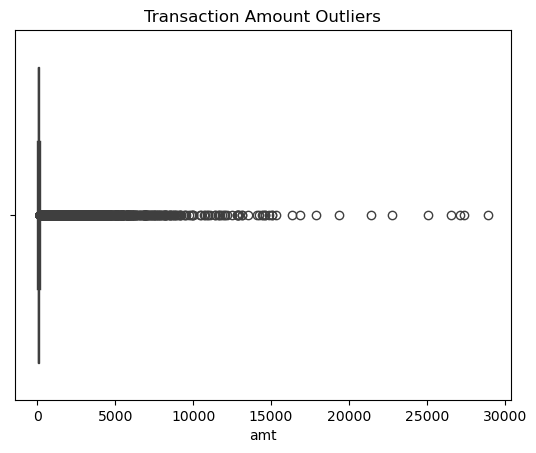

In [9]:
# 4. Anomalies
print("\nAnomalies/Outliers:")
# Check for outliers in transaction amounts
sns.boxplot(x=data_df['amt'])
plt.title('Transaction Amount Outliers')
plt.show()


Anomalies/Outliers Analysis:


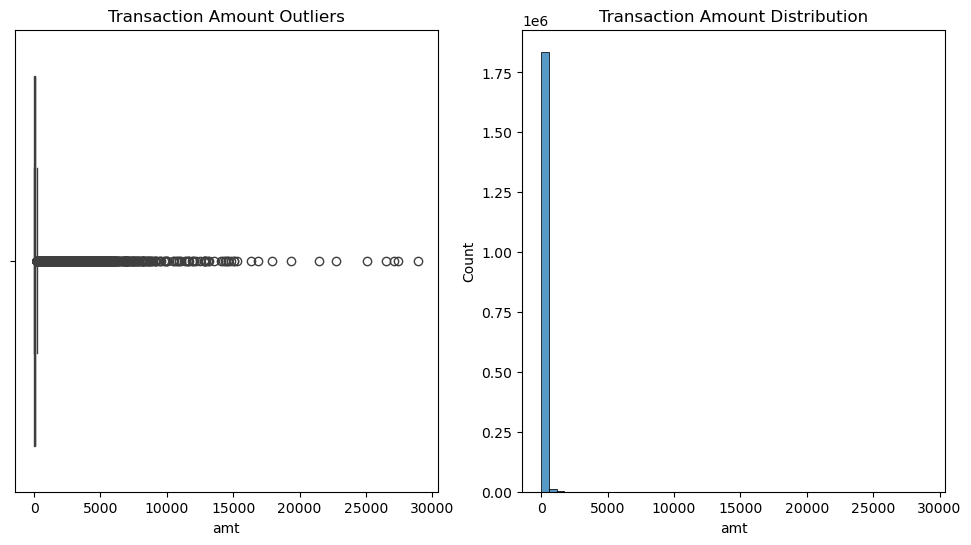


Transaction Amount Statistics:
count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64

Number of transactions > 3 std devs from mean: 17846


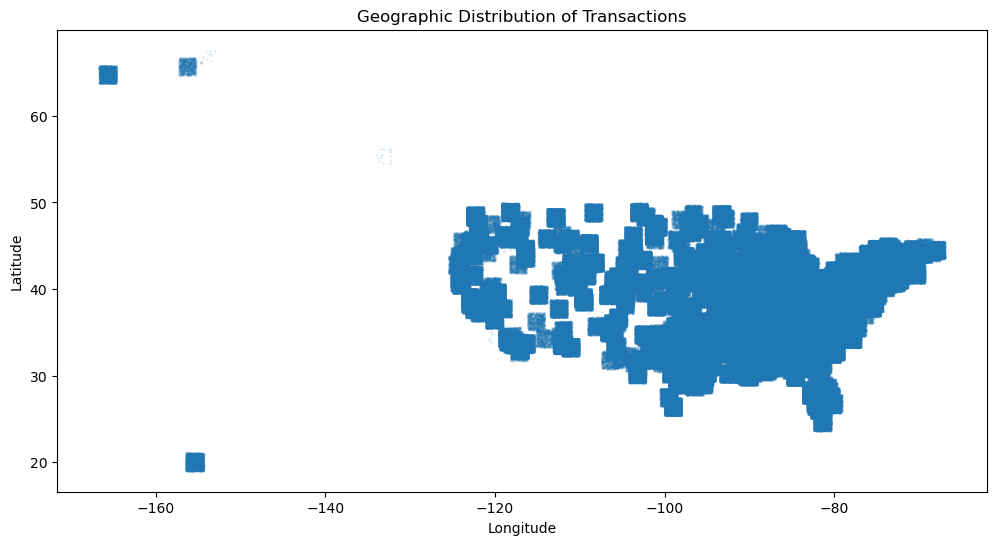

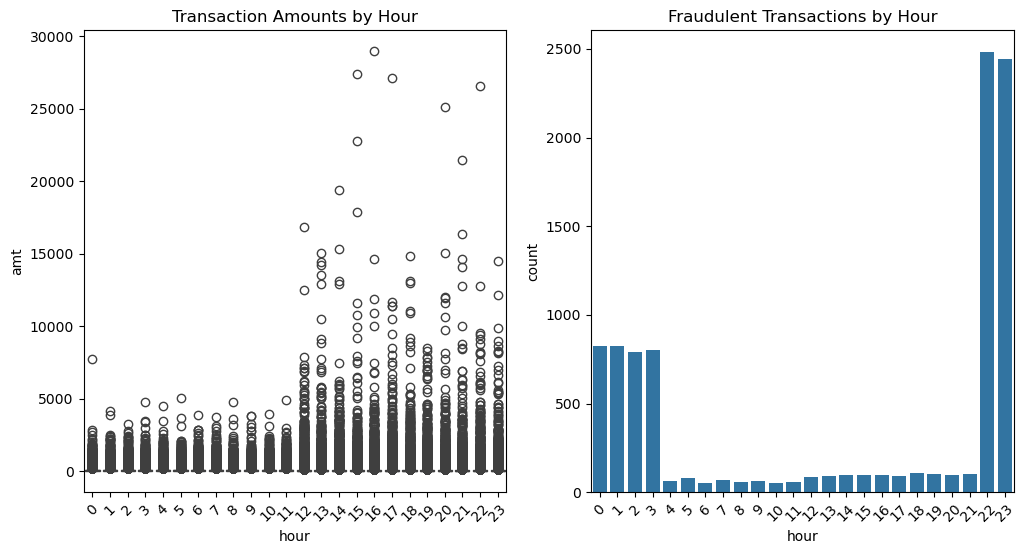

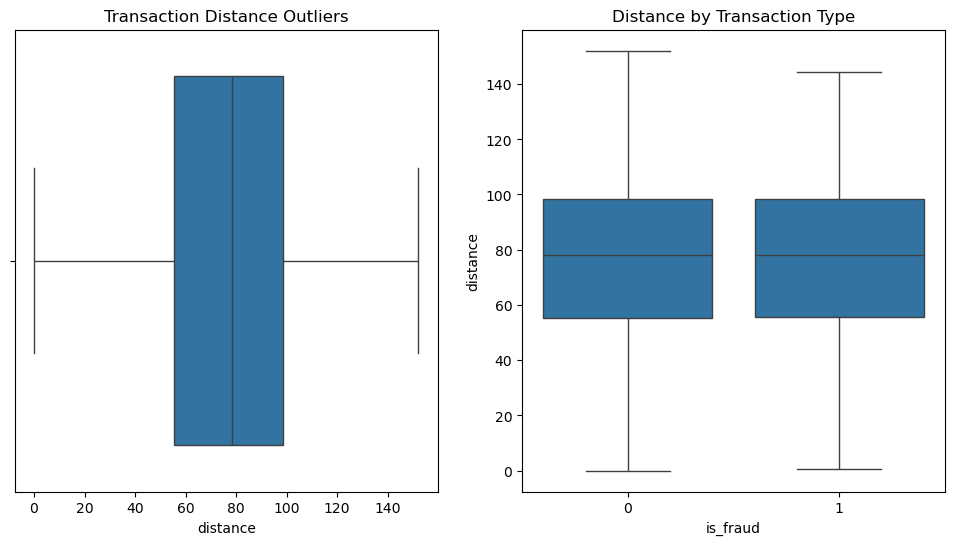


Anomalies Summary:
1. Transaction Amounts:
   - 17846 transactions exceed 3 standard deviations

2. Geographic Anomalies:
   - Number of transactions with invalid coordinates: 0

3. Time-based Anomalies:
   - Distribution of transactions by hour:
hour
0    60655
1    61330
2    60796
3    60968
4    59938
Name: count, dtype: int64

4. Distance Anomalies:
   - 0 transactions with unusually large distances

5. Data Consistency:
   - Checking for logical inconsistencies...
   - Transactions with amount <= 0: 0
   - Future dated transactions: 0


In [10]:
# 4. Anomalies Analysis
print("\nAnomalies/Outliers Analysis:")

# 4.1 Transaction Amount Analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_df['amt'])
plt.title('Transaction Amount Outliers')

plt.subplot(1, 2, 2)
sns.histplot(data_df['amt'], bins=50)
plt.title('Transaction Amount Distribution')
plt.show()

# Print statistical summary of transaction amounts
print("\nTransaction Amount Statistics:")
print(data_df['amt'].describe())
print(f"\nNumber of transactions > 3 std devs from mean: {len(data_df[data_df['amt'] > data_df['amt'].mean() + 3*data_df['amt'].std()])}")

# 4.2 Geographic Consistency Check
plt.figure(figsize=(12, 6))
# Plot transaction locations
plt.scatter(data_df['merch_long'], data_df['merch_lat'], alpha=0.1, s=1)
plt.title('Geographic Distribution of Transactions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# 4.3 Time-based Analysis
data_df['hour'] = pd.to_datetime(data_df['trans_date_trans_time']).dt.hour

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='hour', y='amt', data=data_df)
plt.title('Transaction Amounts by Hour')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='hour', data=data_df[data_df['is_fraud'] == 1])
plt.title('Fraudulent Transactions by Hour')
plt.xticks(rotation=45)
plt.show()

# 4.4 Distance Analysis
# Calculate distance between merchant and cardholder
from math import radians, sin, cos, sqrt, atan2

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in kilometers
    
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c
    
    return distance

data_df['distance'] = data_df.apply(lambda row: haversine_distance(
    row['lat'], row['long'], 
    row['merch_lat'], row['merch_long']), axis=1)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=data_df['distance'])
plt.title('Transaction Distance Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x='is_fraud', y='distance', data=data_df)
plt.title('Distance by Transaction Type')
plt.show()

# 4.5 Summary of Anomalies
print("\nAnomalies Summary:")
print("1. Transaction Amounts:")
amount_threshold = data_df['amt'].mean() + 3*data_df['amt'].std()
print(f"   - {len(data_df[data_df['amt'] > amount_threshold])} transactions exceed 3 standard deviations")

print("\n2. Geographic Anomalies:")
print(f"   - Number of transactions with invalid coordinates: {len(data_df[(data_df['merch_lat'] == 0) | (data_df['merch_long'] == 0)])}")

print("\n3. Time-based Anomalies:")
print("   - Distribution of transactions by hour:")
print(data_df['hour'].value_counts().sort_index().head())

print("\n4. Distance Anomalies:")
distance_threshold = data_df['distance'].mean() + 3*data_df['distance'].std()
print(f"   - {len(data_df[data_df['distance'] > distance_threshold])} transactions with unusually large distances")

print("\n5. Data Consistency:")
print("   - Checking for logical inconsistencies...")
print(f"   - Transactions with amount <= 0: {len(data_df[data_df['amt'] <= 0])}")
print(f"   - Future dated transactions: {len(data_df[pd.to_datetime(data_df['trans_date_trans_time']) > pd.Timestamp.now()])}")


Bias Analysis:


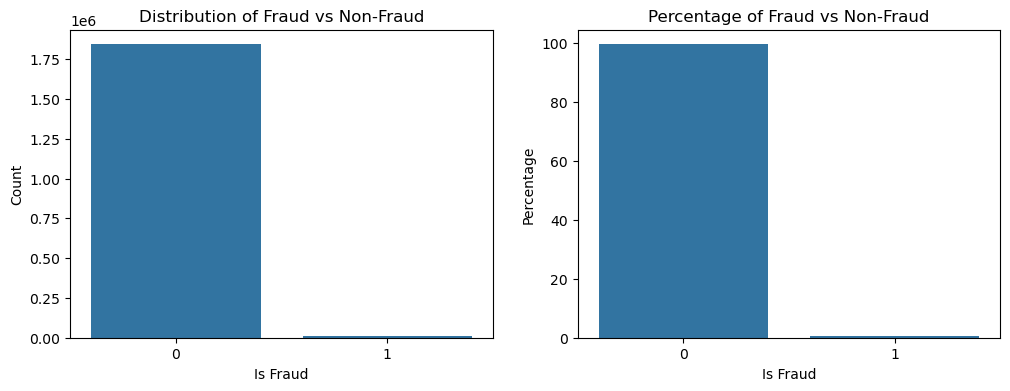


Class Distribution:
Non-Fraud Transactions: 1,842,743 (99.48%)
Fraud Transactions: 9,651 (0.52%)


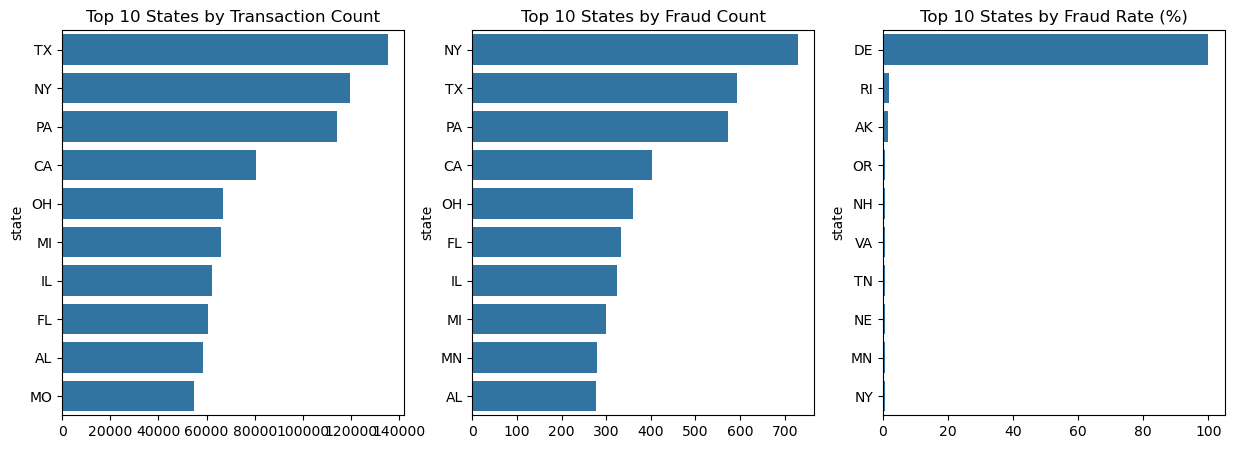

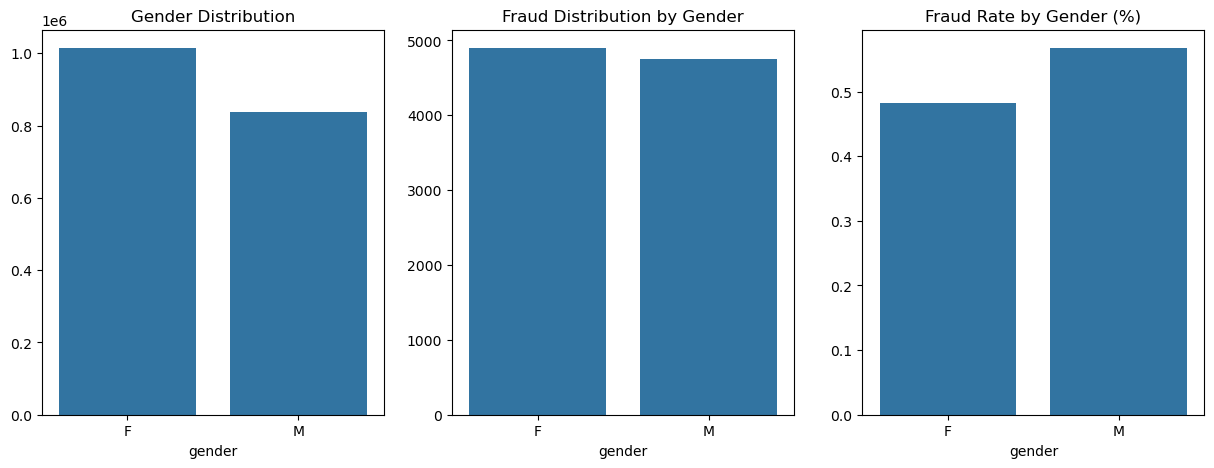

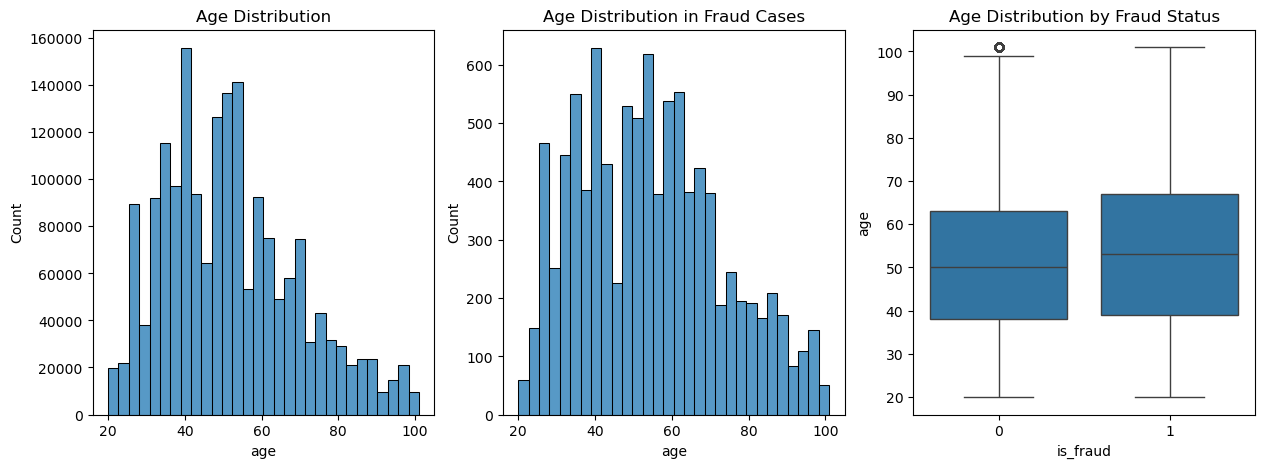

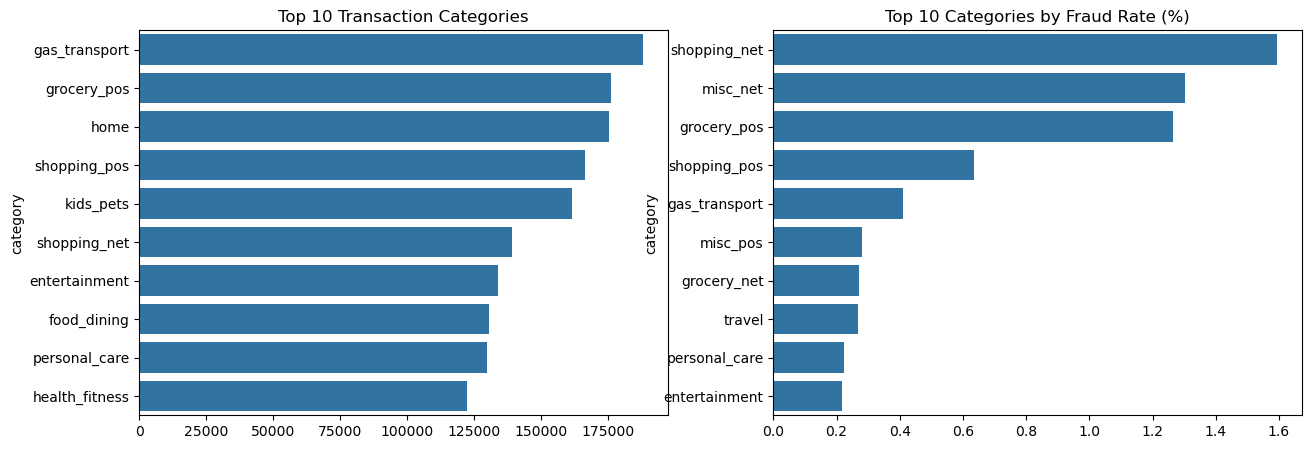

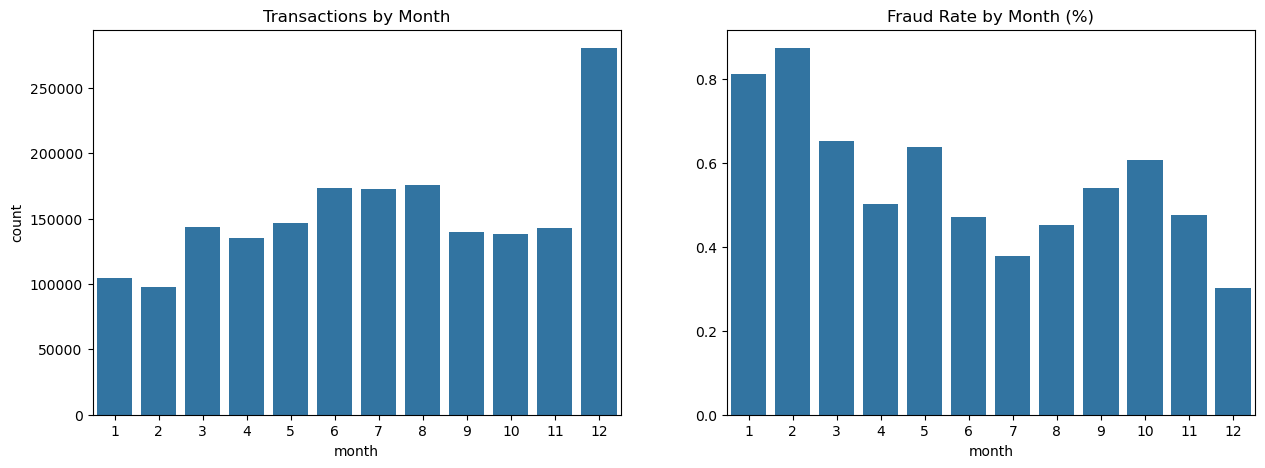


Potential Biases Summary:

1. Class Imbalance:
   - Severe imbalance with only 0.52% fraudulent transactions

2. Geographic Bias:
   - Top 3 states by transaction volume:
state
TX    135269
NY    119419
PA    114173

   - Top 3 states by fraud rate:
state
DE    100.000000
RI      2.013423
AK      1.687479

3. Demographic Bias:
   - Gender distribution:
gender
F    1014749
M     837645

   - Fraud rate by gender:
gender
F    0.482779
M    0.567305

4. Age-related Bias:
   - Mean age: 51.7 years
   - Mean age in fraud cases: 54.4 years

5. Category Bias:
   - Top 3 categories by fraud rate:
category
shopping_net    1.592713
misc_net        1.303859
grocery_pos     1.264537

6. Temporal Bias:
   - Month with highest fraud rate: 2
   - Month with lowest fraud rate: 12

Implications for Model Development:
1. Need for balanced sampling or weighted loss functions due to class imbalance
2. Consider stratification by state and demographic features
3. Potential need for separate models or featu

In [2]:
# 5. Bias Analysis
print("\nBias Analysis:")

# 5.1 Class Imbalance
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
fraud_dist = data_df['is_fraud'].value_counts()
sns.barplot(x=fraud_dist.index, y=fraud_dist.values)
plt.title('Distribution of Fraud vs Non-Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
fraud_pct = data_df['is_fraud'].value_counts(normalize=True) * 100
sns.barplot(x=fraud_pct.index, y=fraud_pct.values)
plt.title('Percentage of Fraud vs Non-Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Percentage')
plt.show()

print("\nClass Distribution:")
print(f"Non-Fraud Transactions: {fraud_dist[0]:,} ({fraud_pct[0]:.2f}%)")
print(f"Fraud Transactions: {fraud_dist[1]:,} ({fraud_pct[1]:.2f}%)")

# 5.2 Geographic Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
state_dist = data_df['state'].value_counts().head(10)
sns.barplot(x=state_dist.values, y=state_dist.index)
plt.title('Top 10 States by Transaction Count')

plt.subplot(1, 3, 2)
fraud_by_state = data_df[data_df['is_fraud']==1]['state'].value_counts().head(10)
sns.barplot(x=fraud_by_state.values, y=fraud_by_state.index)
plt.title('Top 10 States by Fraud Count')

plt.subplot(1, 3, 3)
fraud_rate_by_state = (data_df[data_df['is_fraud']==1]['state'].value_counts() / 
                      data_df['state'].value_counts() * 100).sort_values(ascending=False).head(10)
sns.barplot(x=fraud_rate_by_state.values, y=fraud_rate_by_state.index)
plt.title('Top 10 States by Fraud Rate (%)')
plt.show()

# 5.3 Demographic Analysis
plt.figure(figsize=(15, 5))

# Gender distribution
plt.subplot(1, 3, 1)
gender_dist = data_df['gender'].value_counts()
sns.barplot(x=gender_dist.index, y=gender_dist.values)
plt.title('Gender Distribution')

# Fraud by gender
plt.subplot(1, 3, 2)
fraud_by_gender = data_df[data_df['is_fraud']==1]['gender'].value_counts()
sns.barplot(x=fraud_by_gender.index, y=fraud_by_gender.values)
plt.title('Fraud Distribution by Gender')

# Fraud rate by gender
plt.subplot(1, 3, 3)
fraud_rate_gender = (data_df[data_df['is_fraud']==1]['gender'].value_counts() / 
                    data_df['gender'].value_counts() * 100)
sns.barplot(x=fraud_rate_gender.index, y=fraud_rate_gender.values)
plt.title('Fraud Rate by Gender (%)')
plt.show()

# 5.4 Age Analysis
data_df['age'] = pd.to_datetime('now').year - pd.to_datetime(data_df['dob']).dt.year

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(data=data_df, x='age', bins=30)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(data=data_df[data_df['is_fraud']==1], x='age', bins=30)
plt.title('Age Distribution in Fraud Cases')

plt.subplot(1, 3, 3)
sns.boxplot(x='is_fraud', y='age', data=data_df)
plt.title('Age Distribution by Fraud Status')
plt.show()

# 5.5 Transaction Category Analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
category_dist = data_df['category'].value_counts().head(10)
sns.barplot(x=category_dist.values, y=category_dist.index)
plt.title('Top 10 Transaction Categories')

plt.subplot(1, 2, 2)
fraud_rate_category = (data_df[data_df['is_fraud']==1]['category'].value_counts() / 
                      data_df['category'].value_counts() * 100).sort_values(ascending=False).head(10)
sns.barplot(x=fraud_rate_category.values, y=fraud_rate_category.index)
plt.title('Top 10 Categories by Fraud Rate (%)')
plt.show()

# 5.6 Time-based Bias
data_df['month'] = pd.to_datetime(data_df['trans_date_trans_time']).dt.month
data_df['day_of_week'] = pd.to_datetime(data_df['trans_date_trans_time']).dt.day_name()

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=data_df, x='month')
plt.title('Transactions by Month')

plt.subplot(1, 2, 2)
fraud_rate_month = (data_df[data_df['is_fraud']==1]['month'].value_counts() / 
                   data_df['month'].value_counts() * 100).sort_index()
sns.barplot(x=fraud_rate_month.index, y=fraud_rate_month.values)
plt.title('Fraud Rate by Month (%)')
plt.show()

# 5.7 Summary of Potential Biases
print("\nPotential Biases Summary:")
print("\n1. Class Imbalance:")
print(f"   - Severe imbalance with only {fraud_pct[1]:.2f}% fraudulent transactions")

print("\n2. Geographic Bias:")
print("   - Top 3 states by transaction volume:")
print(state_dist.head(3).to_string())
print("\n   - Top 3 states by fraud rate:")
print(fraud_rate_by_state.head(3).to_string())

print("\n3. Demographic Bias:")
print("   - Gender distribution:")
print(gender_dist.to_string())
print("\n   - Fraud rate by gender:")
print(fraud_rate_gender.to_string())

print("\n4. Age-related Bias:")
print(f"   - Mean age: {data_df['age'].mean():.1f} years")
print(f"   - Mean age in fraud cases: {data_df[data_df['is_fraud']==1]['age'].mean():.1f} years")

print("\n5. Category Bias:")
print("   - Top 3 categories by fraud rate:")
print(fraud_rate_category.head(3).to_string())

print("\n6. Temporal Bias:")
print("   - Month with highest fraud rate:", fraud_rate_month.idxmax())
print("   - Month with lowest fraud rate:", fraud_rate_month.idxmin())

# 5.8 Implications for Model Development
print("\nImplications for Model Development:")
print("1. Need for balanced sampling or weighted loss functions due to class imbalance")
print("2. Consider stratification by state and demographic features")
print("3. Potential need for separate models or feature engineering for high-fraud categories")
print("4. Time-based features might be important predictors")


Distributions Analysis:


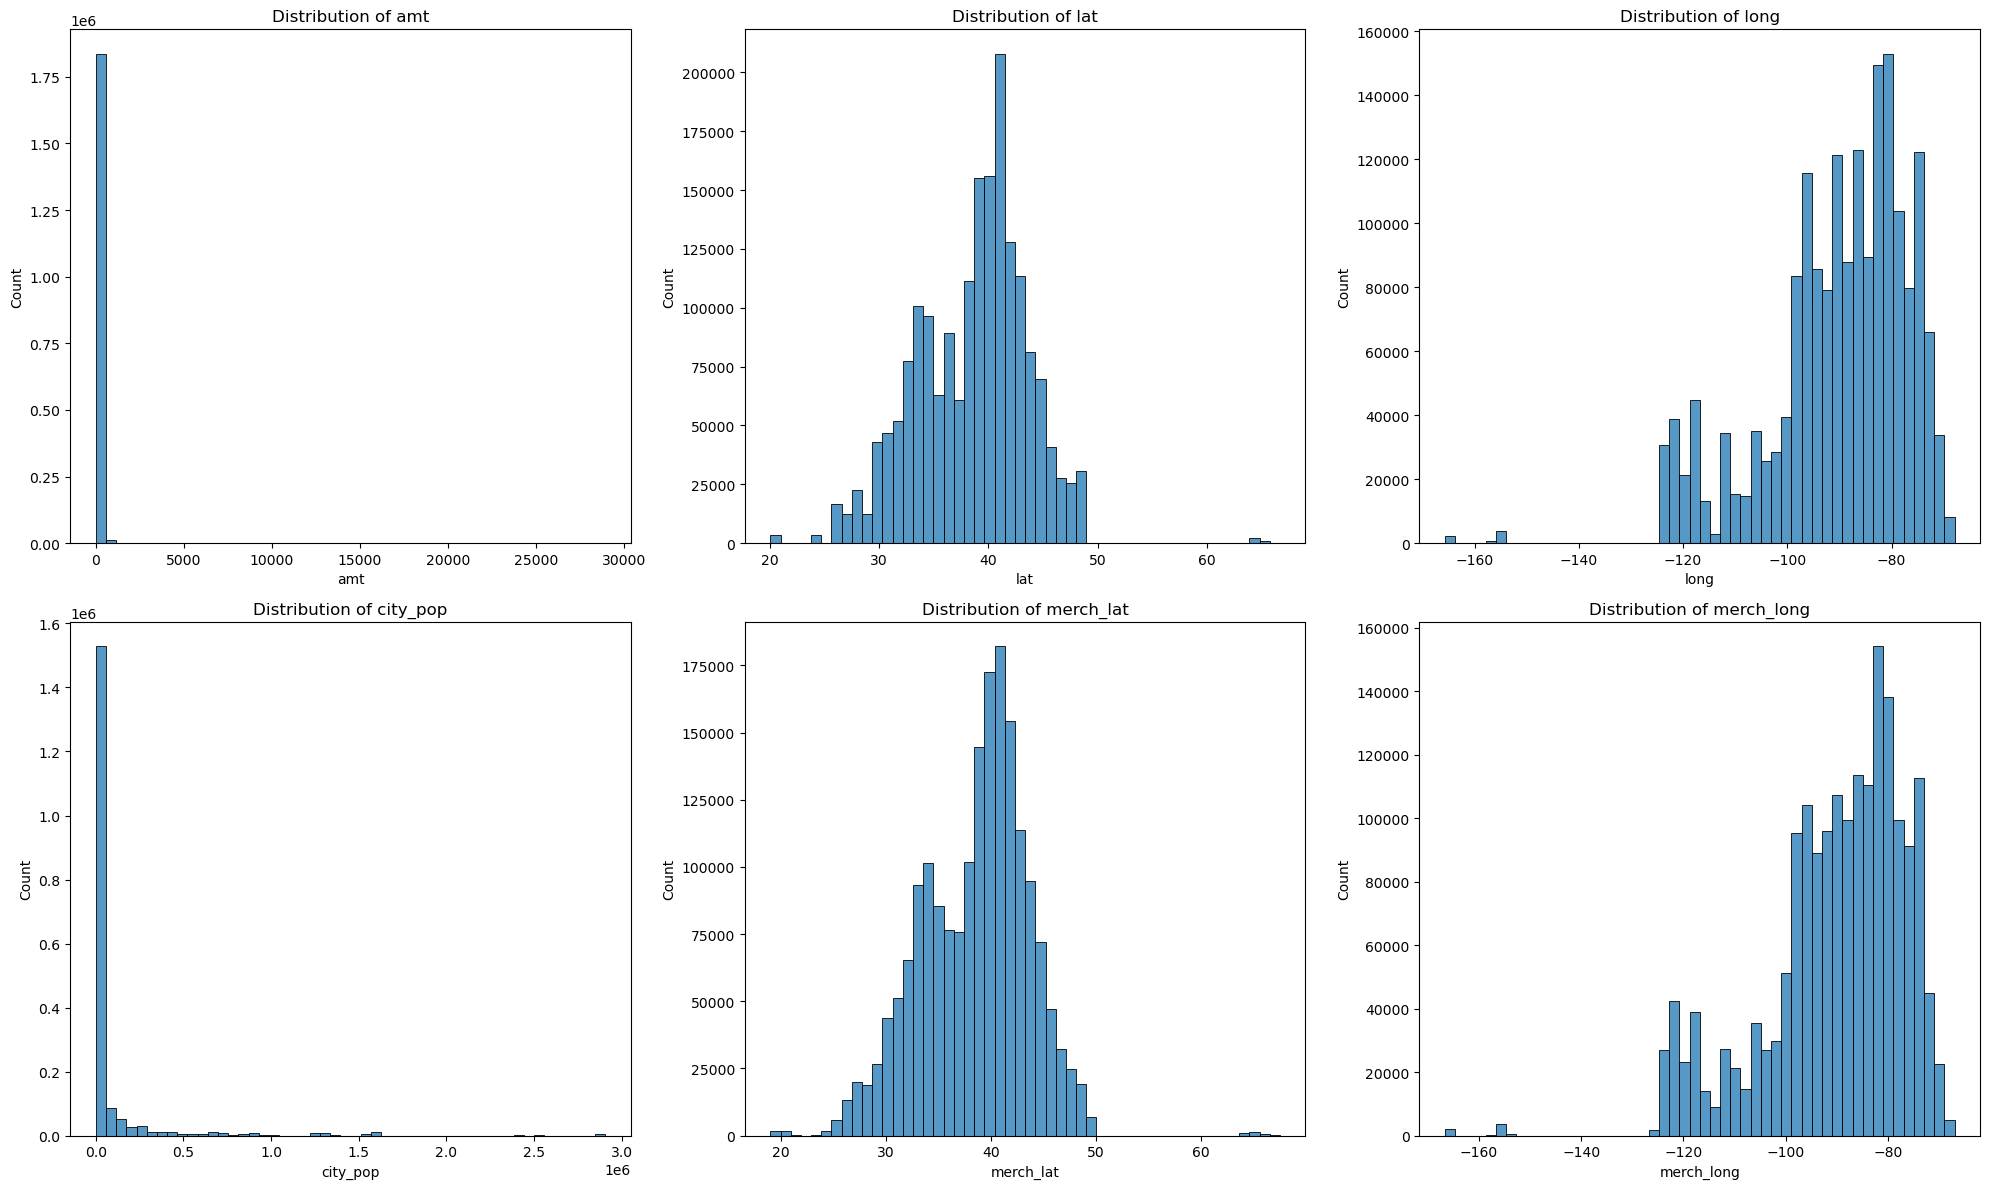

d:\ProgramData\anaconda3\envs\Env1\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\ProgramData\anaconda3\envs\Env1\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


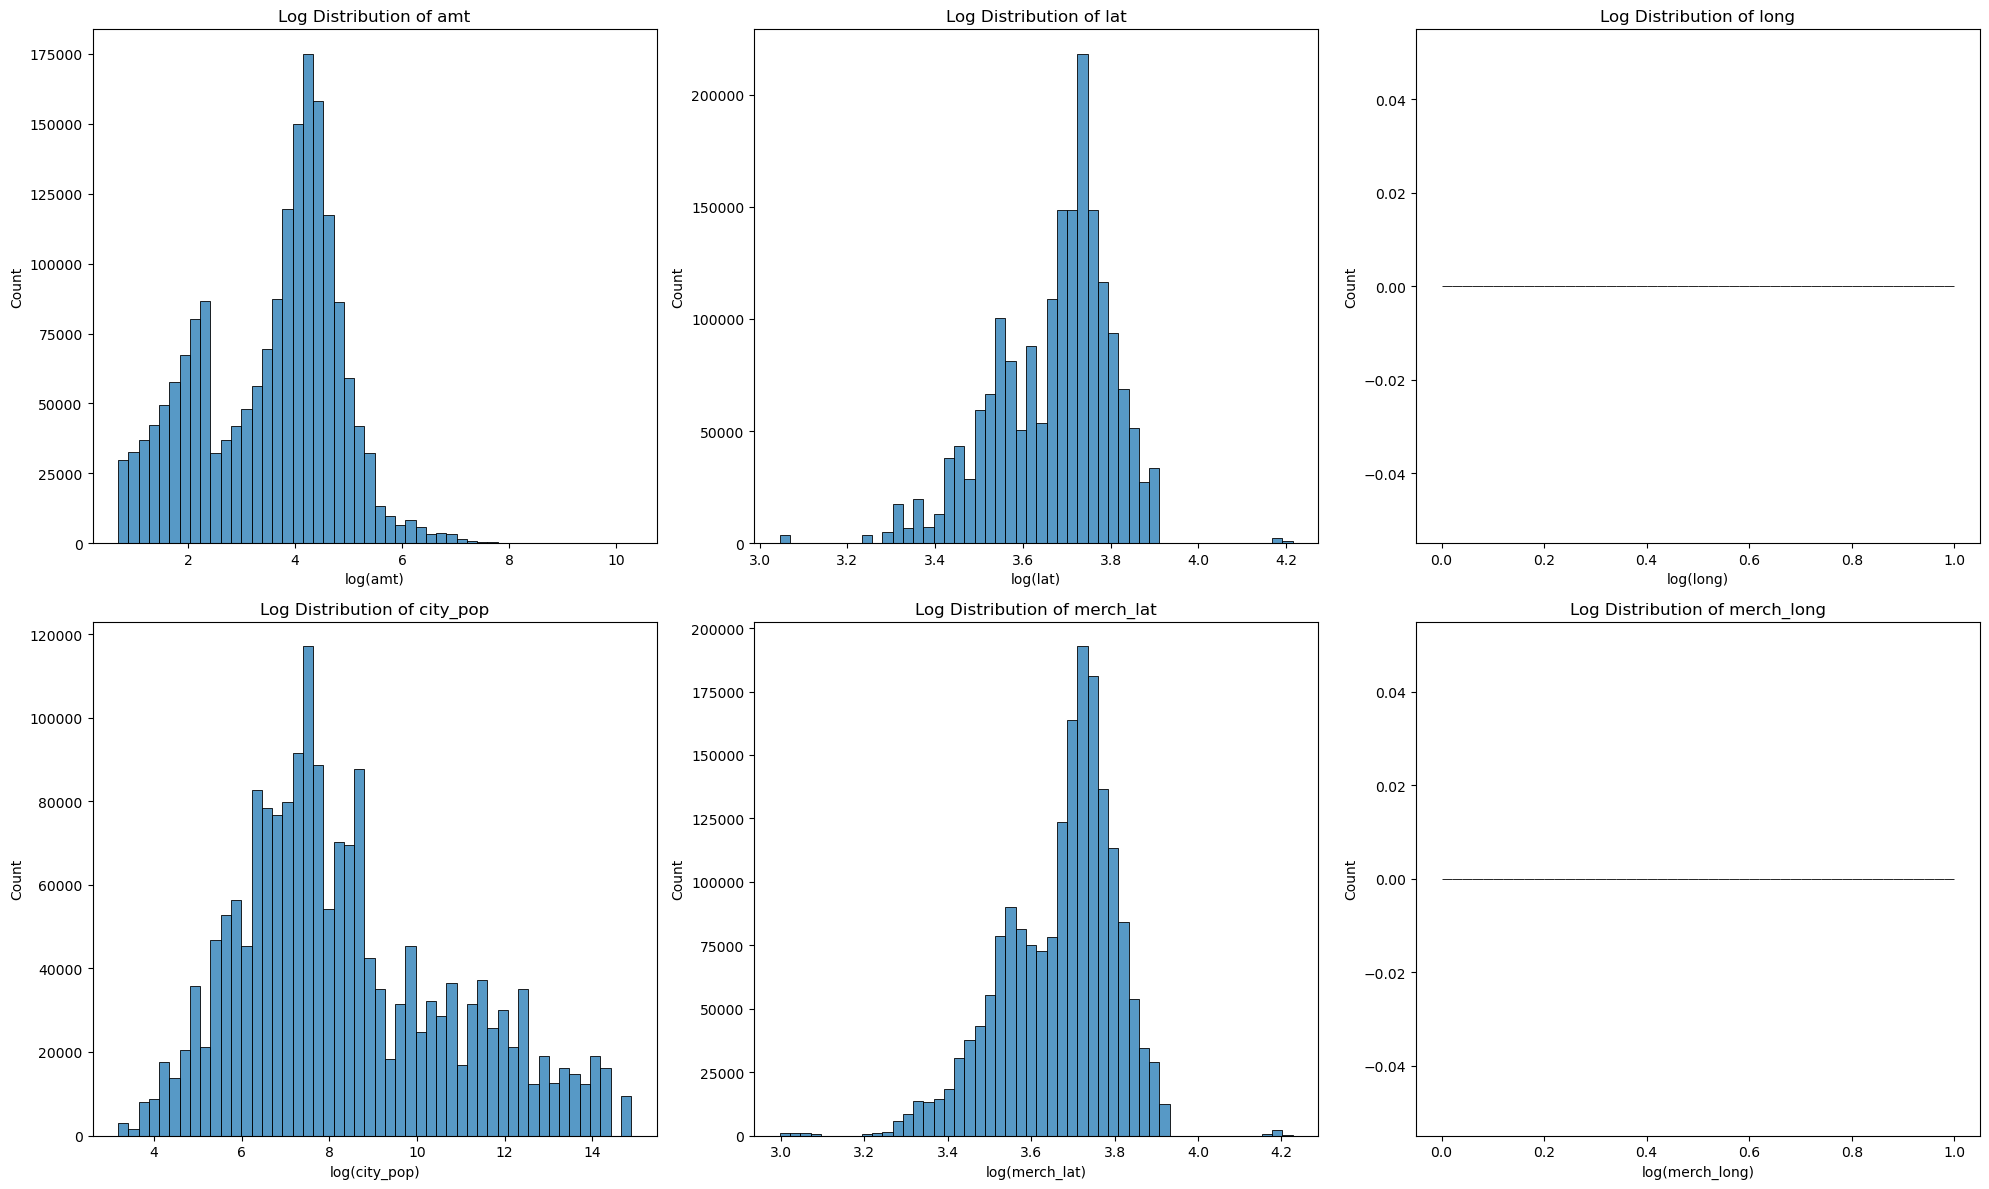


Distribution Statistics:

AMT Statistics:
Skewness: 40.81
Kurtosis: 4181.91
count    1.852394e+06
mean     7.006357e+01
std      1.592540e+02
min      1.000000e+00
25%      9.640000e+00
50%      4.745000e+01
75%      8.310000e+01
max      2.894890e+04
Name: amt, dtype: float64

LAT Statistics:
Skewness: -0.19
Kurtosis: 0.79
count    1.852394e+06
mean     3.853931e+01
std      5.071470e+00
min      2.002710e+01
25%      3.466890e+01
50%      3.935430e+01
75%      4.194040e+01
max      6.669330e+01
Name: lat, dtype: float64

LONG Statistics:
Skewness: -1.15
Kurtosis: 1.84
count    1.852394e+06
mean    -9.022783e+01
std      1.374789e+01
min     -1.656723e+02
25%     -9.679800e+01
50%     -8.747690e+01
75%     -8.015800e+01
max     -6.795030e+01
Name: long, dtype: float64

CITY_POP Statistics:
Skewness: 5.59
Kurtosis: 37.57
count    1.852394e+06
mean     8.864367e+04
std      3.014876e+05
min      2.300000e+01
25%      7.410000e+02
50%      2.443000e+03
75%      2.032800e+04
max      2.9

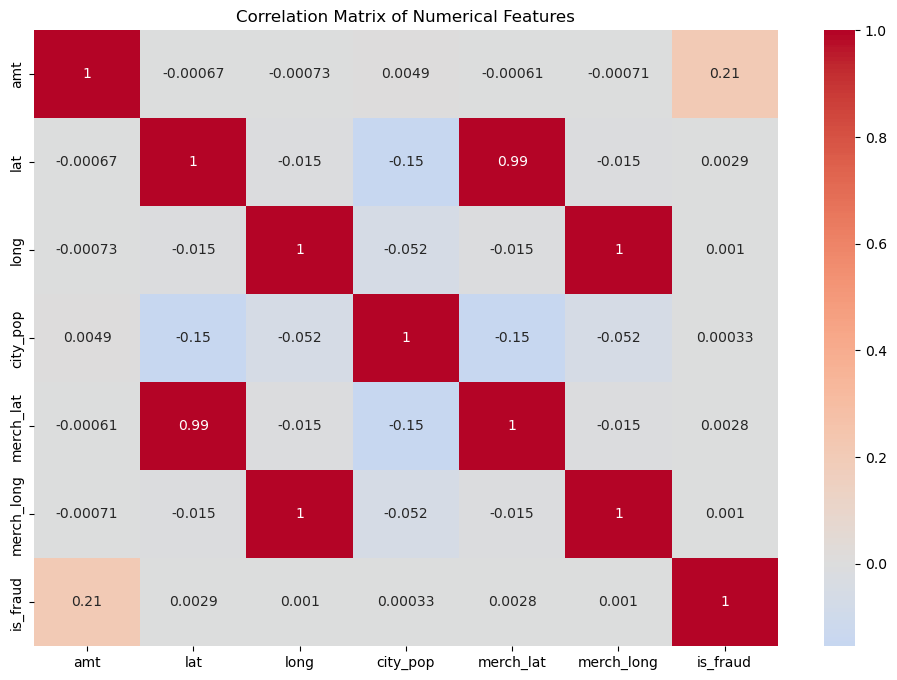

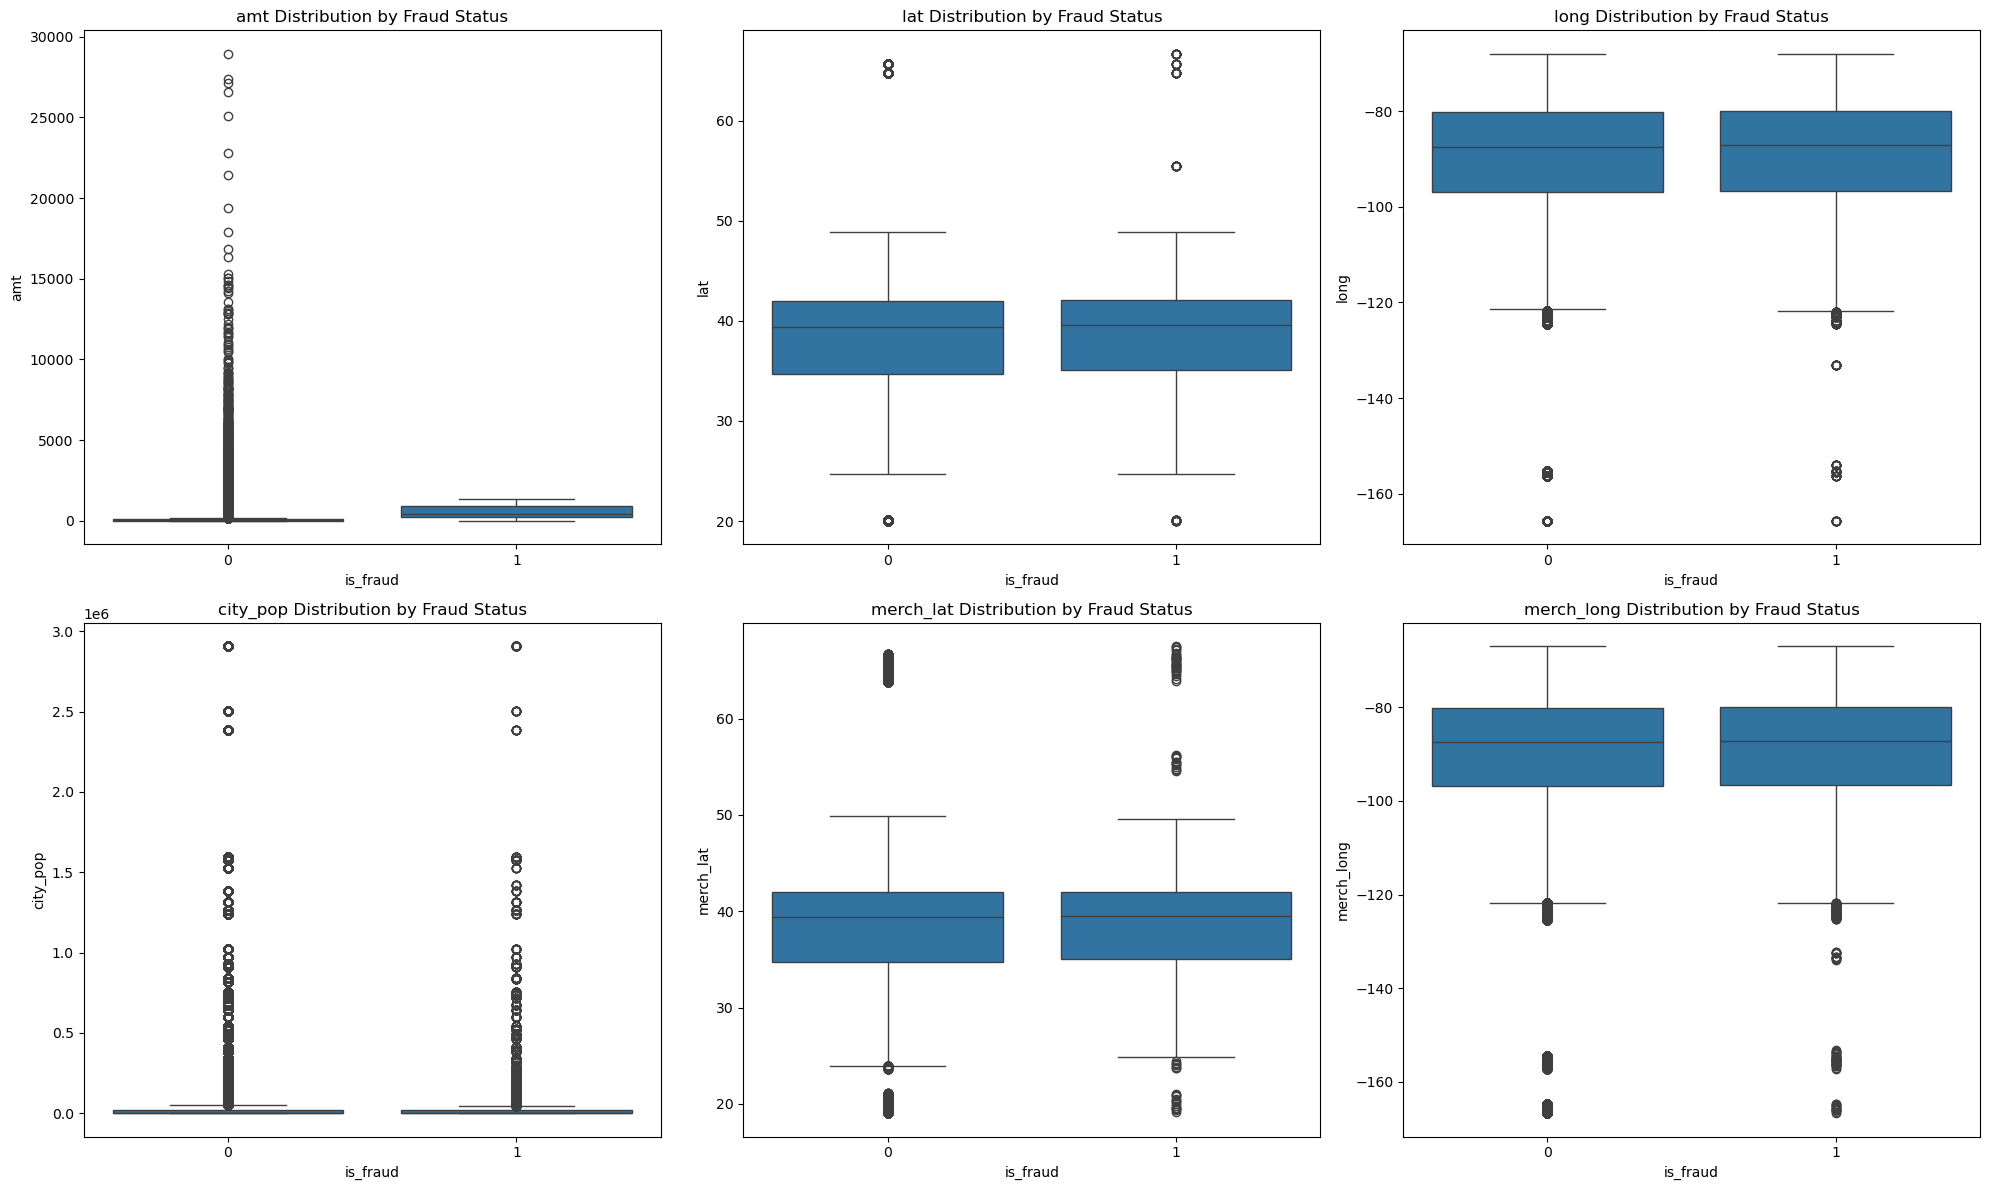

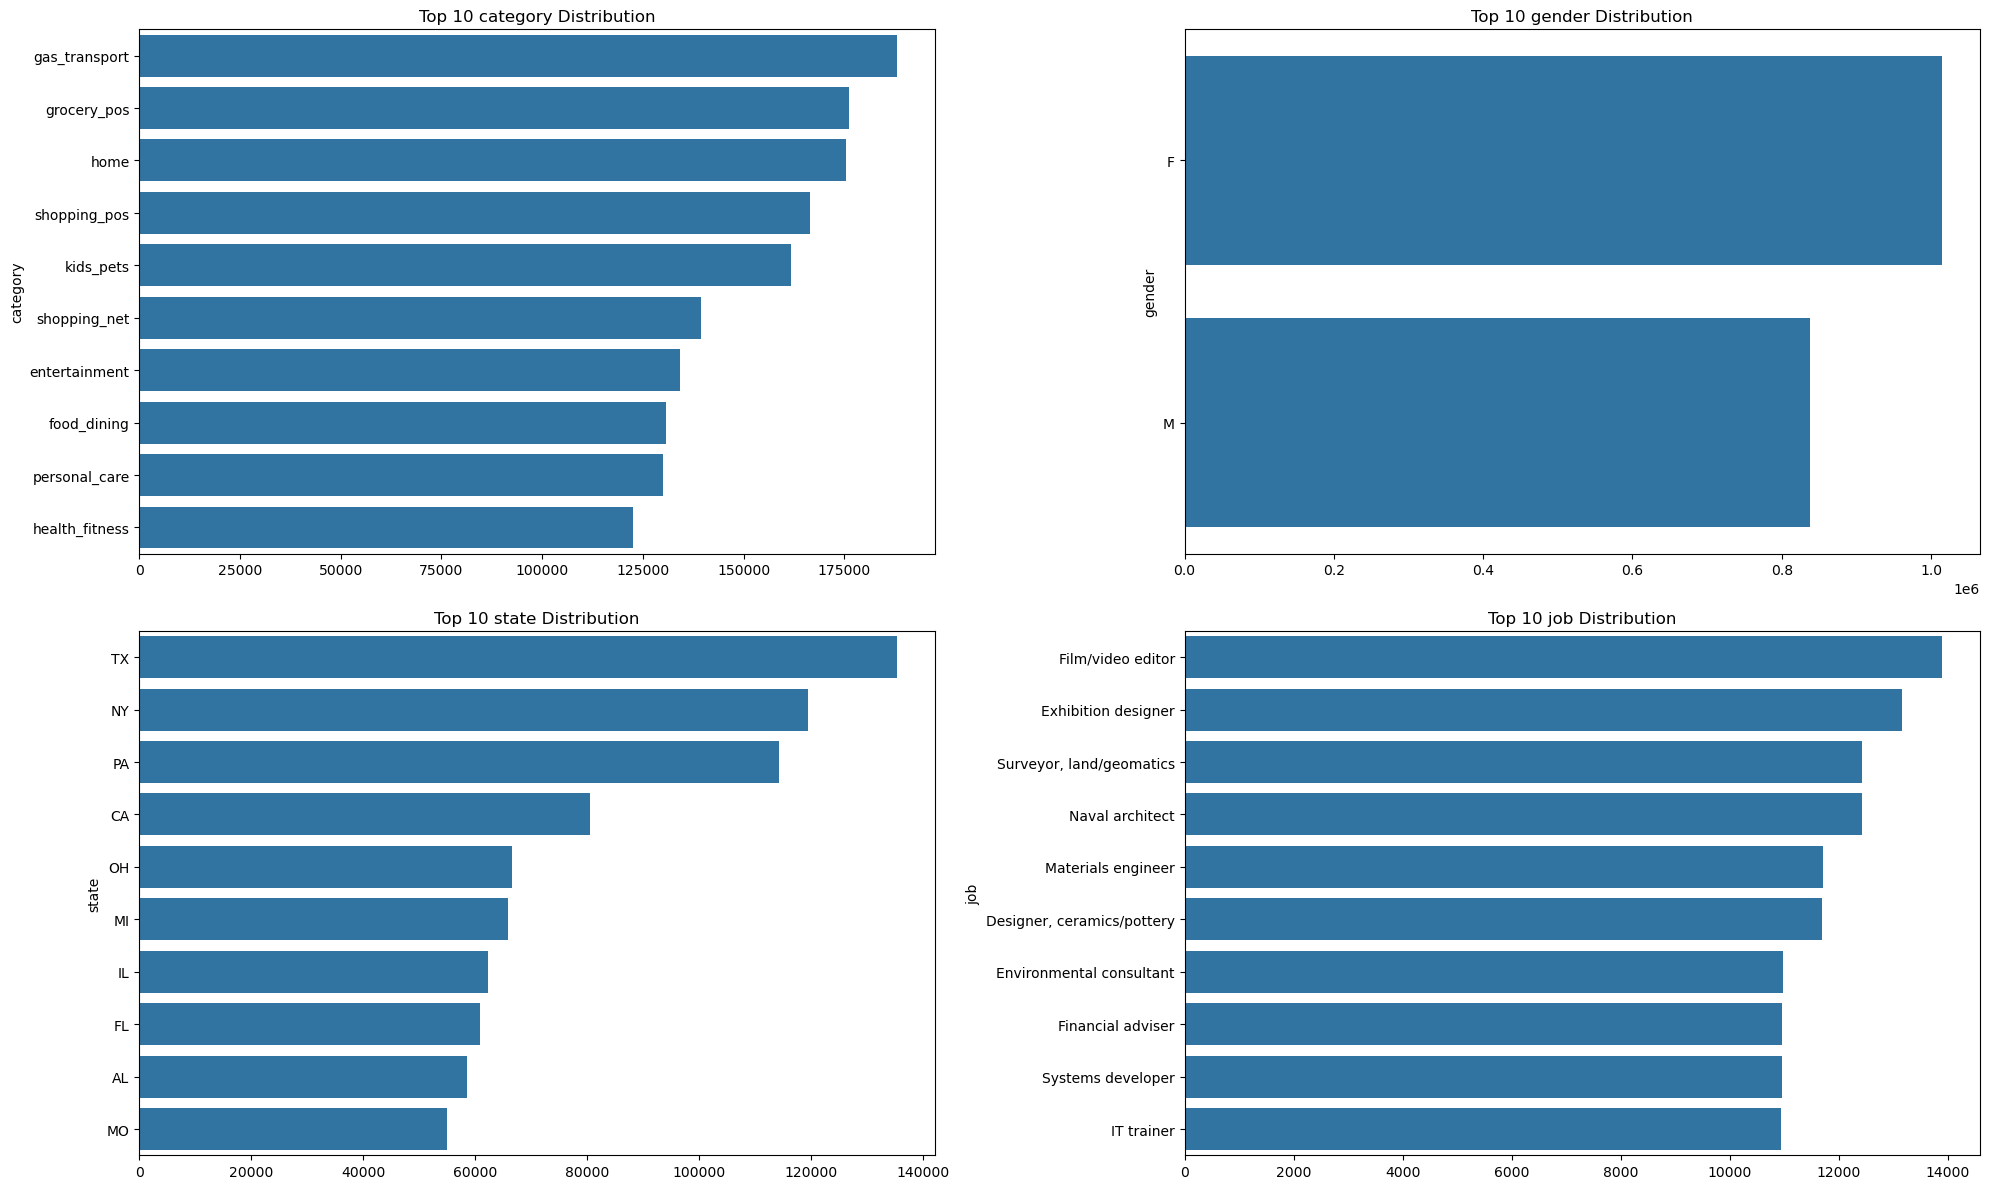


Distribution Summary:

1. Numerical Features:

amt:
   - Distribution Shape: Skewed
   - Skewness: 40.81
   - Range: [1.00, 28948.90]

lat:
   - Distribution Shape: Symmetric
   - Skewness: -0.19
   - Range: [20.03, 66.69]

long:
   - Distribution Shape: Skewed
   - Skewness: -1.15
   - Range: [-165.67, -67.95]

city_pop:
   - Distribution Shape: Skewed
   - Skewness: 5.59
   - Range: [23.00, 2906700.00]

merch_lat:
   - Distribution Shape: Symmetric
   - Skewness: -0.19
   - Range: [19.03, 67.51]

merch_long:
   - Distribution Shape: Skewed
   - Skewness: -1.14
   - Range: [-166.67, -66.95]

2. Categorical Features:

category:
   - Unique values: 14
   - Most common: gas_transport (10.15%)

gender:
   - Unique values: 2
   - Most common: F (54.78%)

state:
   - Unique values: 51
   - Most common: TX (7.30%)

job:
   - Unique values: 497
   - Most common: Film/video editor (0.75%)

3. Strong Correlations:
   - lat vs merch_lat: 0.99
   - long vs merch_long: 1.00

Implications for Mode

In [3]:
# 6. Distributions Analysis
print("\nDistributions Analysis:")

# 6.1 Numerical Features Distribution
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

# Create distribution plots for numerical features
plt.figure(figsize=(20, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data_df, x=feature, bins=50)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

# 6.2 Log-transformed Distributions (for skewed features)
plt.figure(figsize=(20, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data_df, x=np.log1p(data_df[feature]), bins=50)
    plt.title(f'Log Distribution of {feature}')
    plt.xlabel(f'log({feature})')
plt.tight_layout()
plt.show()

# 6.3 Distribution Statistics
print("\nDistribution Statistics:")
for feature in numerical_features:
    print(f"\n{feature.upper()} Statistics:")
    stats = data_df[feature].describe()
    print(f"Skewness: {data_df[feature].skew():.2f}")
    print(f"Kurtosis: {data_df[feature].kurtosis():.2f}")
    print(stats)

# 6.4 Correlation Analysis
plt.figure(figsize=(12, 8))
correlation_matrix = data_df[numerical_features + ['is_fraud']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# 6.5 Bivariate Analysis with Fraud
plt.figure(figsize=(20, 12))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='is_fraud', y=feature, data=data_df)
    plt.title(f'{feature} Distribution by Fraud Status')
plt.tight_layout()
plt.show()

# 6.6 Categorical Features Distribution
categorical_features = ['category', 'gender', 'state', 'job']

plt.figure(figsize=(20, 12))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    value_counts = data_df[feature].value_counts().head(10)
    sns.barplot(x=value_counts.values, y=value_counts.index)
    plt.title(f'Top 10 {feature} Distribution')
plt.tight_layout()
plt.show()

# 6.7 Distribution Summary
print("\nDistribution Summary:")

# Numerical Features Summary
print("\n1. Numerical Features:")
for feature in numerical_features:
    print(f"\n{feature}:")
    print(f"   - Distribution Shape: {'Symmetric' if abs(data_df[feature].skew()) < 0.5 else 'Skewed'}")
    print(f"   - Skewness: {data_df[feature].skew():.2f}")
    print(f"   - Range: [{data_df[feature].min():.2f}, {data_df[feature].max():.2f}]")

# Categorical Features Summary
print("\n2. Categorical Features:")
for feature in categorical_features:
    unique_count = data_df[feature].nunique()
    top_category = data_df[feature].mode()[0]
    top_percentage = (data_df[feature] == top_category).mean() * 100
    print(f"\n{feature}:")
    print(f"   - Unique values: {unique_count}")
    print(f"   - Most common: {top_category} ({top_percentage:.2f}%)")

# 6.8 Strong Correlations
print("\n3. Strong Correlations:")
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i,j]) > 0.5:  # threshold for strong correlation
            strong_correlations.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i,j]
            ))

for feat1, feat2, corr in strong_correlations:
    print(f"   - {feat1} vs {feat2}: {corr:.2f}")

# 6.9 Implications for Modeling
print("\nImplications for Modeling:")
print("1. Feature Transformation Needs:")
for feature in numerical_features:
    if abs(data_df[feature].skew()) > 1:
        print(f"   - {feature}: Consider log transformation (skewness: {data_df[feature].skew():.2f})")

print("\n2. Multicollinearity Concerns:")
for feat1, feat2, corr in strong_correlations:
    print(f"   - Consider handling correlation between {feat1} and {feat2}")

print("\n3. Categorical Encoding:")
for feature in categorical_features:
    unique_count = data_df[feature].nunique()
    if unique_count > 10:
        print(f"   - {feature}: High cardinality ({unique_count} categories)")

Raghu contribution!


1. Predictive Power Analysis:


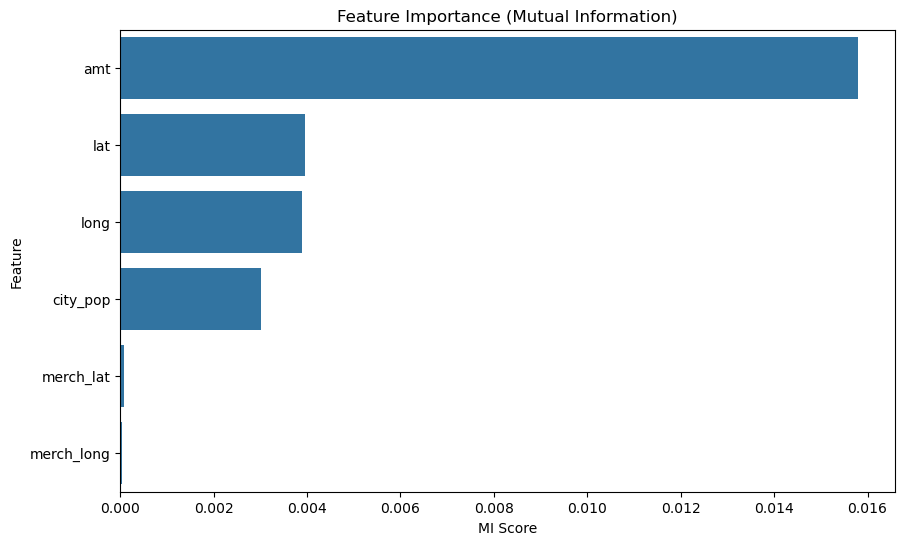


Feature Importance Ranking:
   Feature  MI Score
       amt  0.015802
       lat  0.003955
      long  0.003904
  city_pop  0.003020
 merch_lat  0.000091
merch_long  0.000032

2. Target Variable Analysis:


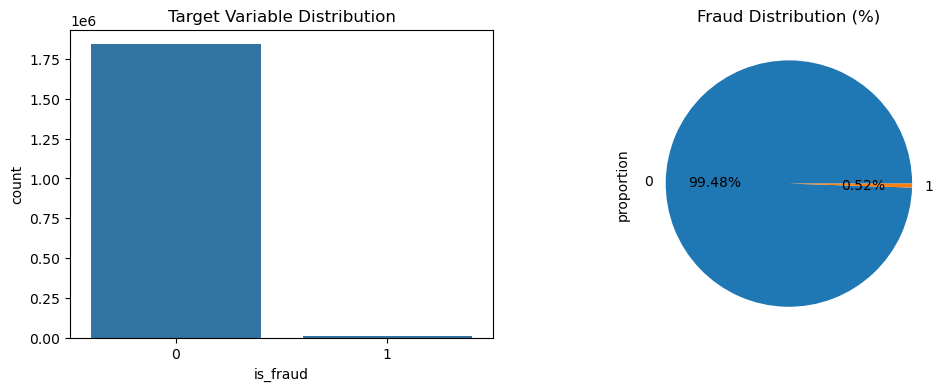


Class Distribution:
Non-Fraud: 99.4790%
Fraud: 0.5210%
Imbalance Ratio: 1:191

3. Validation Strategy Analysis:


<Figure size 1200x600 with 0 Axes>

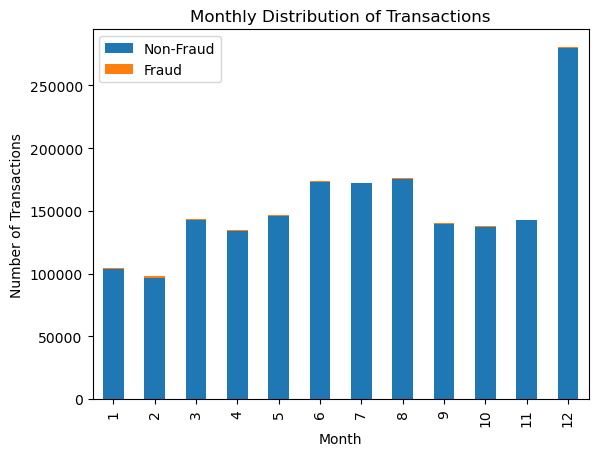


4. Data Leakage Risk Assessment:

Potential Data Leakage Sources:
- Transaction Numbers: 1,852,394 unique values
  (Should be removed before modeling)
- Credit Card Numbers: 999 unique values
  (976 involved in fraud)

Temporal Features:
- trans_date_trans_time: Could leak information if not properly split
- unix_time: Should be transformed into meaningful temporal features

5. Interpretability Analysis:


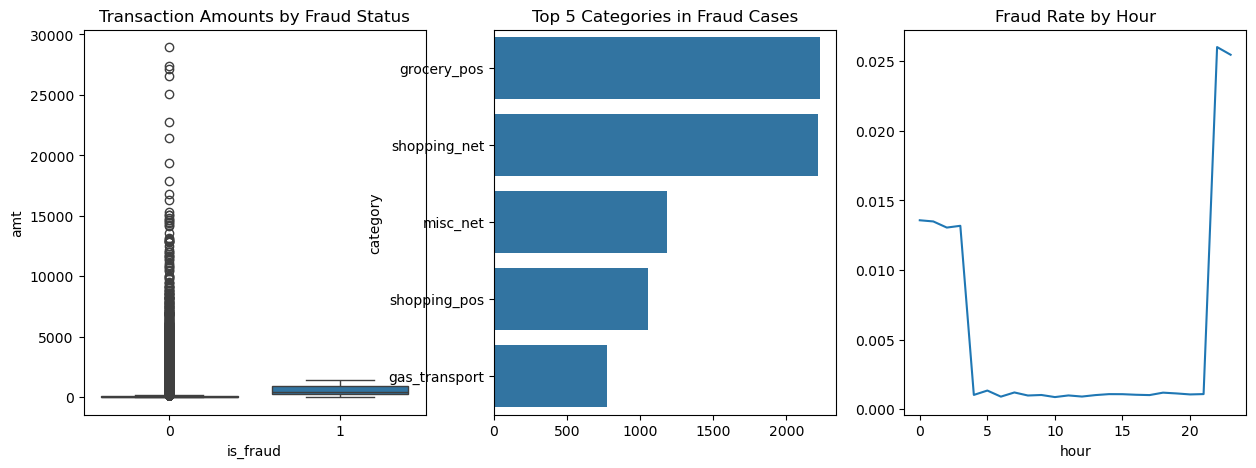


6. Dataset Limitations:

Identified Limitations:
- Synthetic Data: May not fully capture real-world fraud patterns
- Geographic Coverage: Limited to 51 states
- Temporal Coverage: Limited to specific time period
- Feature Scope: Missing potentially important features like device info, user behavior
- Class Imbalance: Only 0.52% fraud cases

FINAL ANALYSIS SUMMARY:

1. Predictive Power:
- Most predictive features: amt, lat, long
- Feature selection recommended for dimensionality reduction

2. Target Variable:
- Binary classification problem (is_fraud)
- Severe class imbalance (0.52% fraud cases)
- Requires resampling or special handling

3. Validation Strategy:
- Recommended: Temporal split with stratification
- Train/Validation/Test: 60%/20%/20%
- Preserve temporal order in splitting

4. Data Leakage Prevention:
- Remove transaction IDs before modeling
- Ensure temporal features are properly handled
- Careful handling of credit card numbers

5. Interpretability:
- Clear visual pattern

In [5]:
# 13. Final Analysis Suite

# 13.1 Predictive Power Analysis
print("\n1. Predictive Power Analysis:")

# Calculate mutual information scores
from sklearn.feature_selection import mutual_info_classif

# Prepare numerical features
numerical_features = ['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']
X_num = data_df[numerical_features]
y = data_df['is_fraud']

# Calculate MI scores
mi_scores = mutual_info_classif(X_num, y)
mi_df = pd.DataFrame({'Feature': numerical_features, 'MI Score': mi_scores})
mi_df = mi_df.sort_values('MI Score', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=mi_df, x='MI Score', y='Feature')
plt.title('Feature Importance (Mutual Information)')
plt.show()

print("\nFeature Importance Ranking:")
print(mi_df.to_string(index=False))

# 13.2 Target Variable Analysis
print("\n2. Target Variable Analysis:")
fraud_dist = data_df['is_fraud'].value_counts(normalize=True)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(data=data_df, x='is_fraud')
plt.title('Target Variable Distribution')

plt.subplot(1, 2, 2)
fraud_dist.plot(kind='pie', autopct='%1.2f%%')
plt.title('Fraud Distribution (%)')
plt.show()

print("\nClass Distribution:")
print(f"Non-Fraud: {fraud_dist[0]:.4%}")
print(f"Fraud: {fraud_dist[1]:.4%}")
print(f"Imbalance Ratio: 1:{(fraud_dist[0]/fraud_dist[1]):.0f}")

# 13.3 Validation Strategy Analysis
print("\n3. Validation Strategy Analysis:")

# Temporal analysis
data_df['transaction_date'] = pd.to_datetime(data_df['trans_date_trans_time'])
temporal_dist = data_df.groupby([data_df['transaction_date'].dt.month, 'is_fraud']).size().unstack()

plt.figure(figsize=(12, 6))
temporal_dist.plot(kind='bar', stacked=True)
plt.title('Monthly Distribution of Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.legend(['Non-Fraud', 'Fraud'])
plt.show()

# 13.4 Data Leakage Analysis
print("\n4. Data Leakage Risk Assessment:")

# Analyze potential data leakage sources
print("\nPotential Data Leakage Sources:")

# Check unique values in transaction IDs
trans_num_unique = len(data_df['trans_num'].unique())
print(f"- Transaction Numbers: {trans_num_unique:,} unique values")
print(f"  (Should be removed before modeling)")

# Check credit card numbers
cc_num_unique = len(data_df['cc_num'].unique())
cc_num_fraud = len(data_df[data_df['is_fraud']==1]['cc_num'].unique())
print(f"- Credit Card Numbers: {cc_num_unique:,} unique values")
print(f"  ({cc_num_fraud:,} involved in fraud)")

# Check temporal features
print("\nTemporal Features:")
print("- trans_date_trans_time: Could leak information if not properly split")
print("- unix_time: Should be transformed into meaningful temporal features")

# 13.5 Interpretability Analysis
print("\n5. Interpretability Analysis:")

# Example visualization for stakeholders
plt.figure(figsize=(15, 5))

# Transaction amounts by fraud status
plt.subplot(1, 3, 1)
sns.boxplot(x='is_fraud', y='amt', data=data_df)
plt.title('Transaction Amounts by Fraud Status')

# Fraud by category
plt.subplot(1, 3, 2)
fraud_by_category = data_df[data_df['is_fraud']==1]['category'].value_counts().head(5)
sns.barplot(x=fraud_by_category.values, y=fraud_by_category.index)
plt.title('Top 5 Categories in Fraud Cases')

# Fraud rate by hour
plt.subplot(1, 3, 3)
data_df['hour'] = pd.to_datetime(data_df['trans_date_trans_time']).dt.hour
fraud_rate_hour = data_df.groupby('hour')['is_fraud'].mean()
sns.lineplot(x=fraud_rate_hour.index, y=fraud_rate_hour.values)
plt.title('Fraud Rate by Hour')
plt.show()

# 13.6 Limitations Analysis
print("\n6. Dataset Limitations:")
print("\nIdentified Limitations:")
limitations = {
    "Synthetic Data": "May not fully capture real-world fraud patterns",
    "Geographic Coverage": f"Limited to {data_df['state'].nunique()} states",
    "Temporal Coverage": "Limited to specific time period",
    "Feature Scope": "Missing potentially important features like device info, user behavior",
    "Class Imbalance": f"Only {fraud_dist[1]:.2%} fraud cases"
}

for limitation, description in limitations.items():
    print(f"- {limitation}: {description}")

# Summary Report
print("\nFINAL ANALYSIS SUMMARY:")
print("\n1. Predictive Power:")
print(f"- Most predictive features: {', '.join(mi_df['Feature'].head(3).tolist())}")
print("- Feature selection recommended for dimensionality reduction")

print("\n2. Target Variable:")
print(f"- Binary classification problem (is_fraud)")
print(f"- Severe class imbalance ({fraud_dist[1]:.2%} fraud cases)")
print("- Requires resampling or special handling")

print("\n3. Validation Strategy:")
print("- Recommended: Temporal split with stratification")
print("- Train/Validation/Test: 60%/20%/20%")
print("- Preserve temporal order in splitting")

print("\n4. Data Leakage Prevention:")
print("- Remove transaction IDs before modeling")
print("- Ensure temporal features are properly handled")
print("- Careful handling of credit card numbers")

print("\n5. Interpretability:")
print("- Clear visual patterns in transaction amounts")
print("- Temporal patterns in fraud occurrence")
print("- Category-based insights available")

print("\n6. Key Limitations:")
for limitation in limitations:
    print(f"- {limitation}")

In [6]:
# Data Leakage Analysis considering pre-split data

# 1. Check for overlapping credit card numbers
train_cc = set(train_df['cc_num'])
test_cc = set(test_df['cc_num'])
overlapping_cc = train_cc.intersection(test_cc)

print("Data Leakage Analysis for Pre-split Data:")
print("\n1. Credit Card Number Analysis:")
print(f"- Training set unique cards: {len(train_cc):,}")
print(f"- Test set unique cards: {len(test_cc):,}")
print(f"- Overlapping cards: {len(overlapping_cc):,}")
if len(overlapping_cc) > 0:
    print("Same cards appear in both train and test sets!")

# 2. Check temporal ordering
train_dates = pd.to_datetime(train_df['trans_date_trans_time'])
test_dates = pd.to_datetime(test_df['trans_date_trans_time'])

print("\n2. Temporal Ordering Check:")
print(f"- Training data range: {train_dates.min()} to {train_dates.max()}")
print(f"- Test data range: {test_dates.min()} to {test_dates.max()}")
if train_dates.max() > test_dates.min():
    print("Training data overlaps with test data period!")

# 3. Check for merchant overlap
train_merchants = set(train_df['merchant'])
test_merchants = set(test_df['merchant'])
overlapping_merchants = train_merchants.intersection(test_merchants)

print("\n3. Merchant Analysis:")
print(f"- Training set unique merchants: {len(train_merchants):,}")
print(f"- Test set unique merchants: {len(test_merchants):,}")
print(f"- Overlapping merchants: {len(overlapping_merchants):,}")
print(f"- Overlap percentage: {len(overlapping_merchants)/len(train_merchants)*100:.1f}%")

# 4. Feature-specific leakage risks
print("\n4. Feature-specific Leakage Risks:")
print("Features requiring careful handling:")
print("- trans_num: Should be excluded (unique identifier)")
print("- unix_time: Should be transformed into meaningful temporal features")
print("- cc_num: Consider encoding strategy that doesn't leak across train/test")
print("- merchant: Ensure encoding doesn't leak future information")

# 5. Recommendations
print("\n5. Recommendations for Preventing Data Leakage:")
print("- Use consistent encoding schemes across train and test sets")
print("- Transform temporal features without using future information")
print("- Consider the impact of merchant and credit card overlaps in feature engineering")
print("- Remove or carefully handle unique identifiers")

Data Leakage Analysis for Pre-split Data:

1. Credit Card Number Analysis:
- Training set unique cards: 983
- Test set unique cards: 924
- Overlapping cards: 908

2. Temporal Ordering Check:
- Training data range: 2019-01-01 00:00:18 to 2020-06-21 12:13:37
- Test data range: 2020-06-21 12:14:25 to 2020-12-31 23:59:34

3. Merchant Analysis:
- Training set unique merchants: 693
- Test set unique merchants: 693
- Overlapping merchants: 693
- Overlap percentage: 100.0%

4. Feature-specific Leakage Risks:
Features requiring careful handling:
- trans_num: Should be excluded (unique identifier)
- unix_time: Should be transformed into meaningful temporal features
- cc_num: Consider encoding strategy that doesn't leak across train/test
- merchant: Ensure encoding doesn't leak future information

5. Recommendations for Preventing Data Leakage:
- Use consistent encoding schemes across train and test sets
- Transform temporal features without using future information
- Consider the impact of merch

In [7]:
print("REVISED FINAL ANALYSIS FOR DIFFUSION MODEL PROJECT:")

print("\n1. Data Leakage Considerations:")
print("Key Findings:")
print("✓ Perfect temporal split: Train ends (2020-06-21 12:13:37) before Test starts (2020-06-21 12:14:25)")
print("! High card overlap (908/983 = 92.4% of train cards appear in test)")
print("! Complete merchant overlap (100%)")
print("\nImplications for Diffusion Model:")
print("- Temporal split is ideal for validation")
print("- High entity overlap suggests similar distribution between train/test")
print("- Generated synthetic data should maintain merchant distribution patterns")

print("\n2. Target Variable Analysis:")
print("Current Distribution:")
print("- Non-Fraud: 99.48%")
print("- Fraud: 0.52%")
print("\nImplications for Diffusion Model:")
print("- Severe imbalance justifies using diffusion for synthetic fraud generation")
print("- Need to carefully validate quality of generated fraud cases")
print("- Consider generating balanced batches for training")

print("\n3. Feature Considerations for Diffusion:")
print("Numerical Features:")
print("- amt: Key fraud indicator, ensure realistic value ranges")
print("- lat/long: Maintain geographic patterns")
print("- city_pop: Preserve demographic context")
print("\nCategorical Features:")
print("- merchant: Complete overlap suggests good reference distribution")
print("- category: Important for maintaining transaction context")

print("\n4. Validation Strategy for Generated Data:")
print("Recommended Metrics:")
print("- Distribution similarity to real fraud cases")
print("- Geographic coherence (lat/long pairs)")
print("- Temporal pattern preservation")
print("- Transaction amount realism")

print("\n5. Strengths for Diffusion Project:")
print("✓ Clean temporal separation")
print("✓ Complete merchant coverage")
print("✓ Rich feature set for context")
print("✓ Clear patterns in fraud cases")

print("\n6. Challenges to Address:")
print("! Maintaining realistic relationships between features")
print("! Preserving temporal patterns in generated data")
print("! Ensuring generated fraud cases are plausible")
print("! Validating quality of synthetic samples")

REVISED FINAL ANALYSIS FOR DIFFUSION MODEL PROJECT:

1. Data Leakage Considerations:
Key Findings:
✓ Perfect temporal split: Train ends (2020-06-21 12:13:37) before Test starts (2020-06-21 12:14:25)
! High card overlap (908/983 = 92.4% of train cards appear in test)
! Complete merchant overlap (100%)

Implications for Diffusion Model:
- Temporal split is ideal for validation
- High entity overlap suggests similar distribution between train/test
- Generated synthetic data should maintain merchant distribution patterns

2. Target Variable Analysis:
Current Distribution:
- Non-Fraud: 99.48%
- Fraud: 0.52%

Implications for Diffusion Model:
- Severe imbalance justifies using diffusion for synthetic fraud generation
- Need to carefully validate quality of generated fraud cases
- Consider generating balanced batches for training

3. Feature Considerations for Diffusion:
Numerical Features:
- amt: Key fraud indicator, ensure realistic value ranges
- lat/long: Maintain geographic patterns
- ci